In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted
from os.path import exists,basename
from glob import glob
import cv2
import os
import numpy as np
%matplotlib inline

In [3]:
dires='plot/HOI/videos/'
npy_dires='plot/HOI/npy/'


In [16]:
for video_dire in natsorted(glob(dires+'/*.mp4')):
    cap=cv2.VideoCapture(video_dire)
    video_name=basename(video_dire)[:-4]
    frame_idx=0
    while cap.isOpened():
        sucess,frame=cap.read()
        if not sucess:
            break
        target_folder=os.path.join('plot','HOI','imgs',video_name)
        if not exists(target_folder):
            os.makedirs(target_folder)
        
        filename=os.path.join(target_folder,'{:04d}.jpg'.format(frame_idx))

        cv2.imwrite(filename=filename,img=frame)

        frame_idx+=1

        

   

In [5]:
##img _dire
img_dires='plot/HOI/imgs/'
classnames=[i for i in os.listdir(img_dires)]

In [12]:
classnames[0].split('_')[0]

'+hoi'

In [13]:
basename(video_dire)[:-4]

'Drink.Fromcup_p02_r03_v11_c02'

/tmp/ipykernel_3756502/1899629933.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.004)


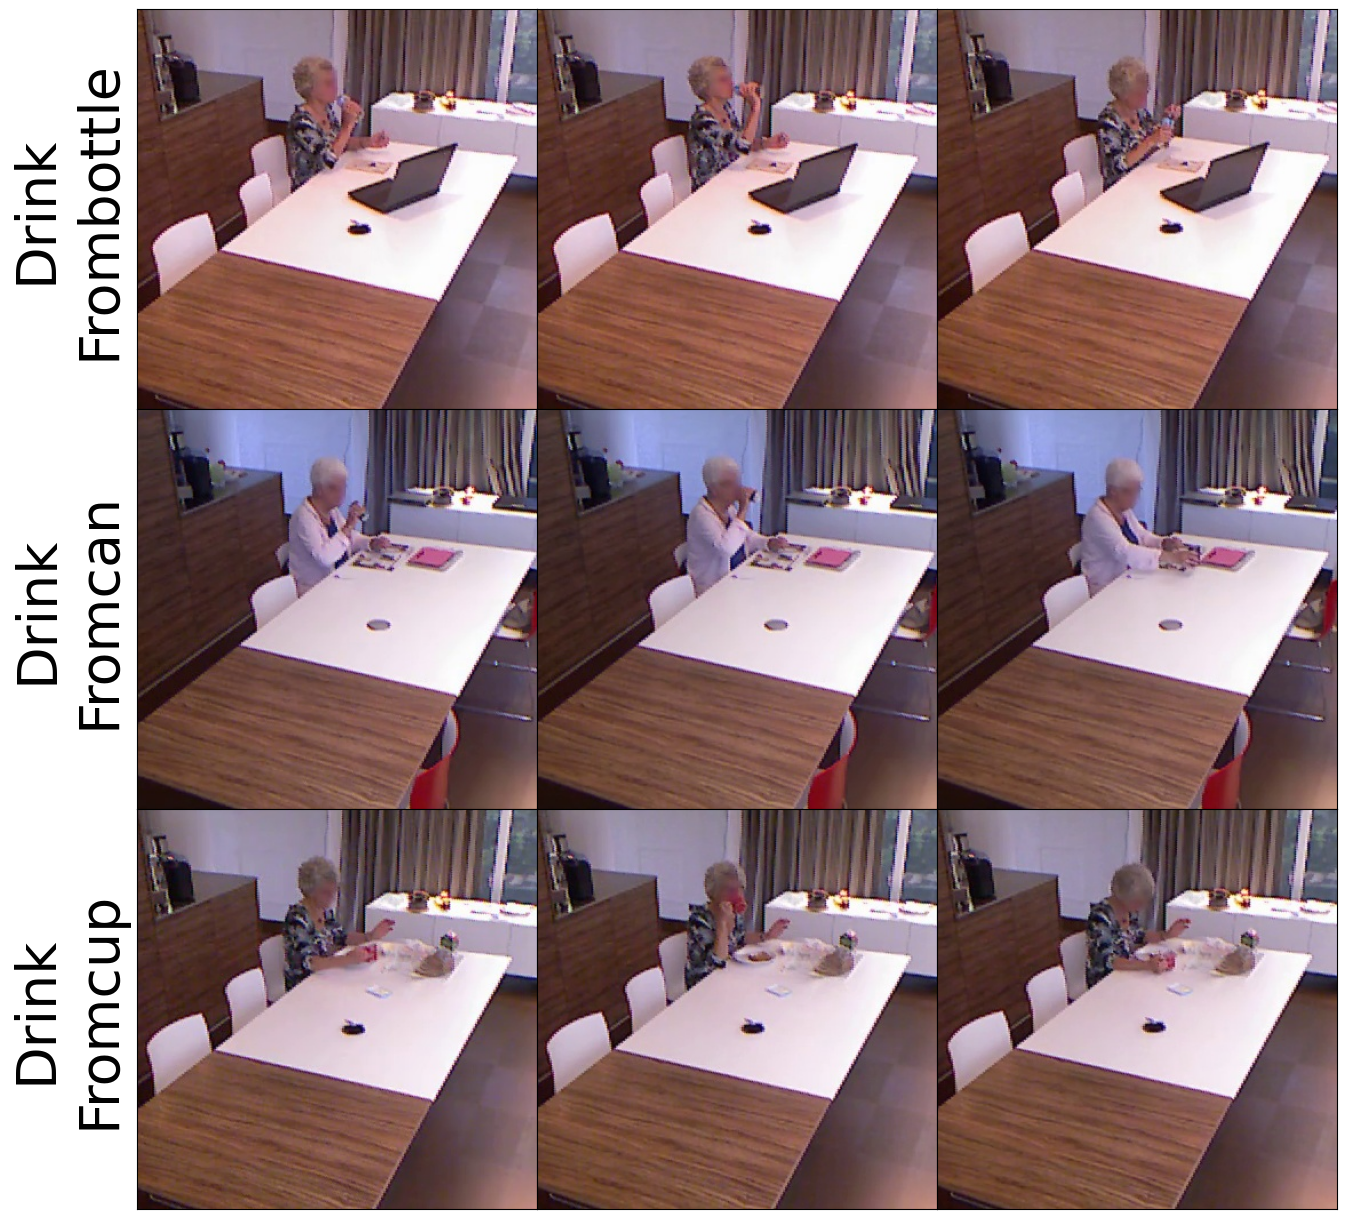

In [11]:


fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,15),gridspec_kw={'left':0.1, 'right':0.7, 'bottom':0.1, 'top':0.9, 'wspace':0, 'hspace':0})

fig.tight_layout(pad=0.004)
fig.subplots_adjust(wspace=0.001, hspace=0.05)

for j,classname in enumerate(natsorted(classnames)):
    
    titlename=classname.split('_')[0].split('.')[0]+'\n'+classname.split('_')[0].split('.')[1]
    for i,img_dire in enumerate(glob((os.path.join(img_dires,classname)+'/*.jpg'))):
        img=cv2.imread(img_dire)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axes[j][i].imshow(img)
        axes[j][i].set_yticks([])
        axes[j][i].set_xticks([])
        

        if i == 0:
            axes[j][i].set_ylabel(titlename,fontsize=40 )
       

fig.savefig("{}HOI.jpg".format(img_dires), bbox_inches='tight')